<a href="https://colab.research.google.com/github/yogeshchappewar/Short-and-Sweet/blob/main/Hclustering_update_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [2]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [3]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [4]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Univ.iloc[:,1:]))
data

,0,1,2,3,4,5
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


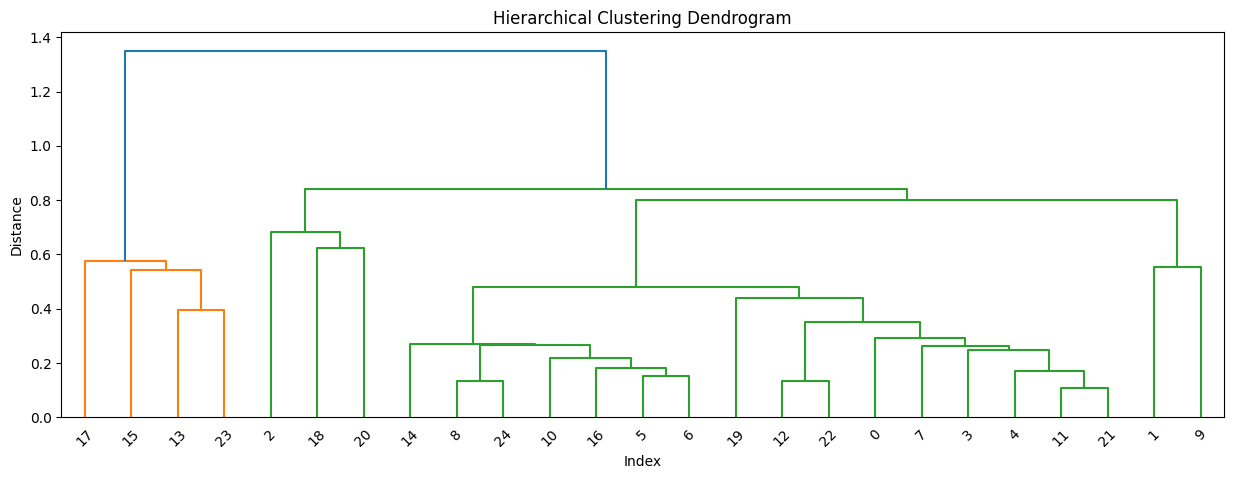

In [5]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [7]:
Univ.iloc[:,1:].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
clust,,,,,,,
0,1210.0000,80.00,54.0,16.500,15305.000,81.500,0.0
1,1061.5000,38.75,70.0,19.250,9953.000,71.750,1.0
2,1360.0000,87.50,34.5,6.500,61133.000,84.000,2.0
3,1313.4375,85.00,29.0,11.625,29186.625,92.375,3.0
4,1260.0000,62.00,59.0,9.000,25026.000,72.000,4.0


In [8]:
data = Univ[(Univ.clust==1)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [9]:
data = Univ[(Univ.clust==0)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
18,UCBerkeley,1240,95,40,17,15140,78,0
20,UMichigan,1180,65,68,16,15470,85,0


In [10]:
data = Univ[(Univ.clust==3)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
10,MIT,1380,94,30,10,34870,91,3
11,Northwestern,1260,85,39,11,28052,89,3
12,NotreDame,1255,81,42,13,15122,94,3


In [11]:
data = Univ[(Univ.clust==2)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Univ_subset = pd.DataFrame(scaler.fit_transform(Univ.iloc[:,1:7]))
Univ_subset

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


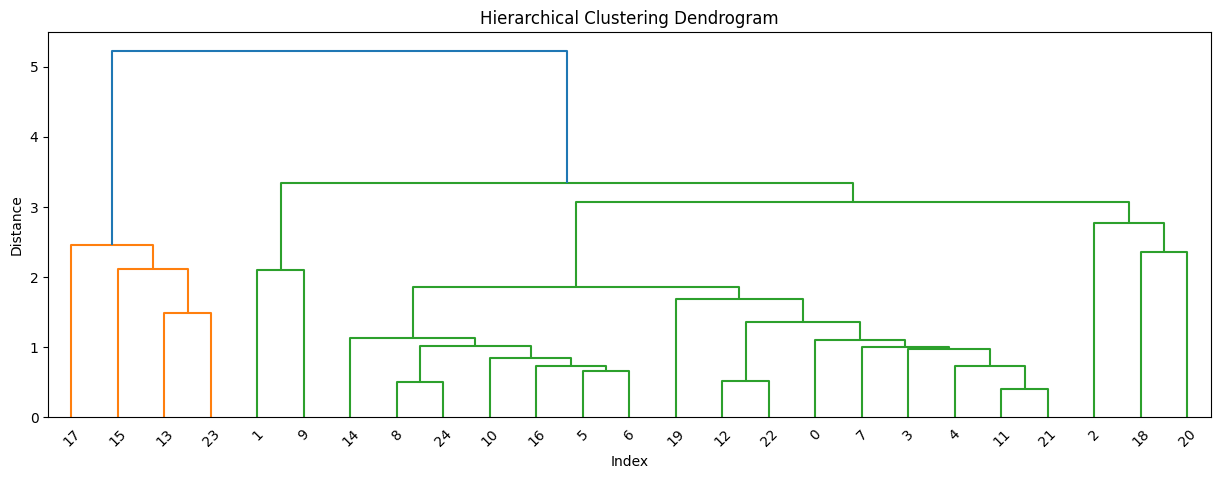

In [13]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(Univ_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(Univ_subset)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [15]:
Univ.iloc[:,1:].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
clust,,,,,,,
0,1061.5000,38.75,70.0,19.250,9953.000,71.750,0.0
1,1210.0000,80.00,54.0,16.500,15305.000,81.500,1.0
2,1360.0000,87.50,34.5,6.500,61133.000,84.000,2.0
3,1313.4375,85.00,29.0,11.625,29186.625,92.375,3.0
4,1260.0000,62.00,59.0,9.000,25026.000,72.000,4.0


In [16]:
data = Univ[(Univ.clust==0)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
13,PennState,1081,38,54,18,10185,80,0
15,Purdue,1005,28,90,19,9066,69,0
17,TexasA&M,1075,49,67,25,8704,67,0
23,UWisconsin,1085,40,69,15,11857,71,0


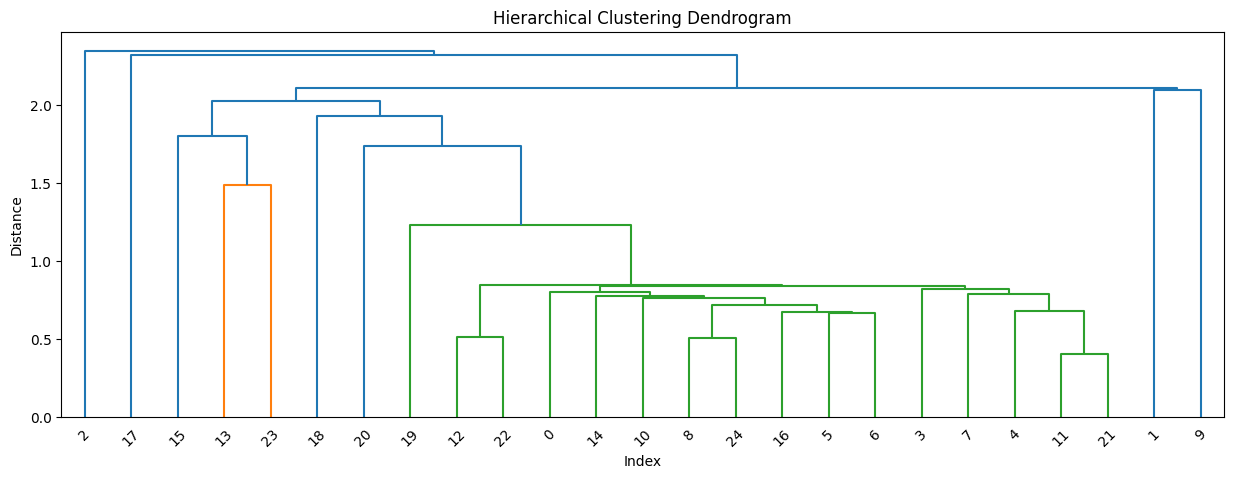

In [17]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(Univ_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(Univ_subset)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [19]:
data = Univ[(Univ.clust==2)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
17,TexasA&M,1075,49,67,25,8704,67,2
